In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
import matplotlib
import os
import datetime as dt 

In [124]:
# Setting up datetime object of that fateful day
the_decision = dt.datetime(2010, 7,8, 0,0,0)
rudy_gobert = dt.datetime(2020, 12, 12, 0,0,0) # Date when Rudy Gobert gave everybody COVID

In [125]:
# Reading in our dataset -- produced by get_job_data script
data_path = os.path.join(".", "data", "job_quits_formatted.csv")
df = pd.read_csv(data_path)

In [126]:
df.head()

,Unnamed: 0,year,period,series_id,value,total_quits
0,0,2000,M12,JTU000000000000000QUL,2331,2331000
1,1,2001,M01,JTU000000000000000QUL,3425,3425000
2,2,2001,M02,JTU000000000000000QUL,2472,2472000
3,3,2001,M03,JTU000000000000000QUL,2615,2615000
4,4,2001,M04,JTU000000000000000QUL,3312,3312000


In [127]:
# Cleaning the dataset a bit
df['month'] = df['period'].str.replace("M", "")  # replacing mont codes with just month #
df['date'] = df['year'].astype(str) + "-" + df['month']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

In [128]:
# Getting separate sub dfs for post and post decision
post_decision = df.loc[df['date'] > the_decision]
pre_decision = df.loc[df['date'] < the_decision]

In [129]:
# Getting Avg # of jobs quit per month post and post decision
avg_quits_pre = int(pre_decision['total_quits'].mean())
avg_quits_post = int(post_decision['total_quits'].mean())
print("Avg # of Jobs quit per month (Pre/Post Decision):")
print(f"Pre-Decision: {avg_quits_pre}")
print(f'Post-Decision: {avg_quits_post}')

Avg # of Jobs quit per month (Pre/Post Decision):
Pre-Decision: 2544801
Post-Decision: 2830244


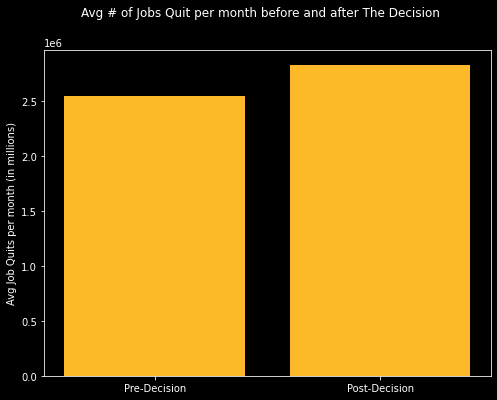

In [130]:
f, ax = plt.subplots(figsize=(8,6))
ax.bar(['Pre-Decision', 'Post-Decision'], [avg_quits_pre, avg_quits_post], color='#FDB927')
ax.set_ylabel('Avg Job Quits per month (in millions)')
f.suptitle(r'Avg # of Jobs Quit per month before and after The Decision')

f.savefig(os.path.join("img", "barplot_pre&post_quits.png"))

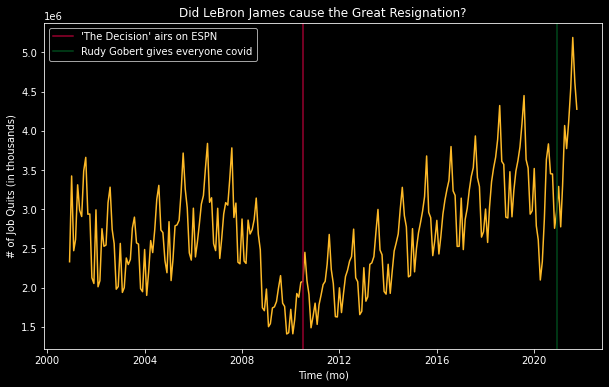

In [131]:
# Plotting line graph of quits with decision airdate in red
f,ax = plt.subplots(figsize=(10,6))
ax.plot(df['date'], df['total_quits'], c='#FDB927')
ax.set_xlabel('Time (mo)')
ax.set_ylabel("# of Job Quits (in thousands)")
ax.set_title("Did LeBron James cause the Great Resignation?")
plt.axvline(the_decision, c='#98002E', label="'The Decision' airs on ESPN")
plt.axvline(rudy_gobert, c='#00471b', label='Rudy Gobert gives everyone covid')
ax.legend()
plt.show()

f.savefig(os.path.join("img", "time_series_jobquits.png"))

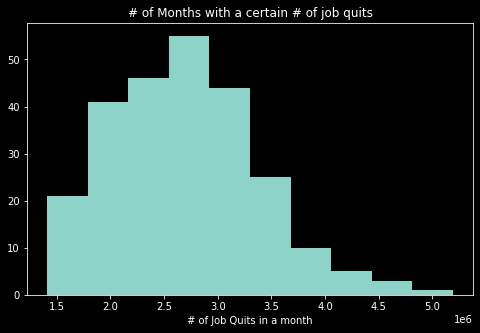

In [132]:
# Let's look at a histogram of job quits 
f, ax = plt.subplots(figsize=(8,5))
ax.hist(df['total_quits'])
ax.set_title('# of Months with a certain # of job quits')
ax.set_xlabel('# of Job Quits in a month')
plt.show()


In [133]:
# Testing job quits time series for statistical significance
# Want to see change in trendline for pre and post-decision periods
from scipy.optimize import curve_fit

In [134]:
def linModel(m,x,b):
    return m*x + b

In [135]:
# Pre-decision model
pre_decision['timestamp'] = pre_decision['date'].view('int64')

# Generating fit from datetime/quits series
fitCoeffs_pre, fitCovariances_pre = curve_fit(linModel, pre_decision.timestamp, pre_decision.total_quits)

print(fitCoeffs_pre, fitCovariances_pre)

m_pre = fitCoeffs_pre[0]
b_pre = fitCoeffs_pre[1]

# Post-decision model
post_decision['timestamp'] = post_decision['date'].view('int64')

# Generating fit from datetime/quits series
fitCoeffs_post, fitCovariances_post = curve_fit(linModel, post_decision.timestamp, post_decision.total_quits)

print(fitCoeffs_post, fitCovariances_post)

m_post = fitCoeffs_post[0]
b_post = fitCoeffs_post[1]

[-2.20508459e-12  5.02948885e+06] [[ 3.08468740e-25 -3.47582272e-07]
 [-3.47582272e-07  3.94047317e+11]]
[ 5.59582230e-12 -5.32196436e+06] [[ 1.53808493e-25 -2.24074119e-07]
 [-2.24074119e-07  3.28055278e+11]]


/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


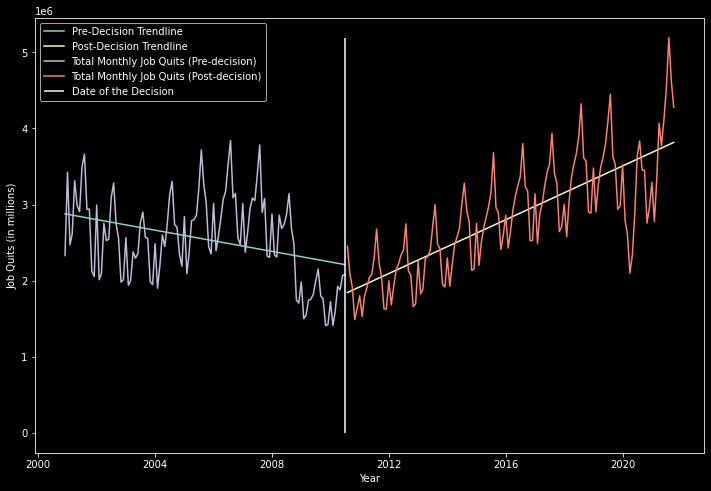

In [136]:
f,ax = plt.subplots(figsize=(12,8))
ax.plot(pre_decision['date'], linModel(m_pre, pre_decision.timestamp, b_pre), label='Pre-Decision Trendline')
ax.plot(post_decision['date'], linModel(m_post, post_decision.timestamp, b_post), label='Post-Decision Trendline')

# Plot actual job quit numbers with models
ax.plot(pre_decision['date'], pre_decision['total_quits'], label='Total Monthly Job Quits (Pre-decision)')
ax.plot(post_decision['date'], post_decision['total_quits'], label='Total Monthly Job Quits (Post-decision)')

ax.vlines(the_decision, ymin=0, ymax=np.max(df['total_quits']), label='Date of the Decision')

ax.set_xlabel('Year')
ax.set_ylabel('Job Quits (in millions)')
ax.legend()


In [137]:
# Printing out 

print(f'Linear model slope pre-Decision: {m_pre}')
print(f'Linear model slope post-Decision: {m_post}')

Linear model slope pre-Decision: -2.205084589159674e-12
Linear model slope post-Decision: 5.5958223009913655e-12


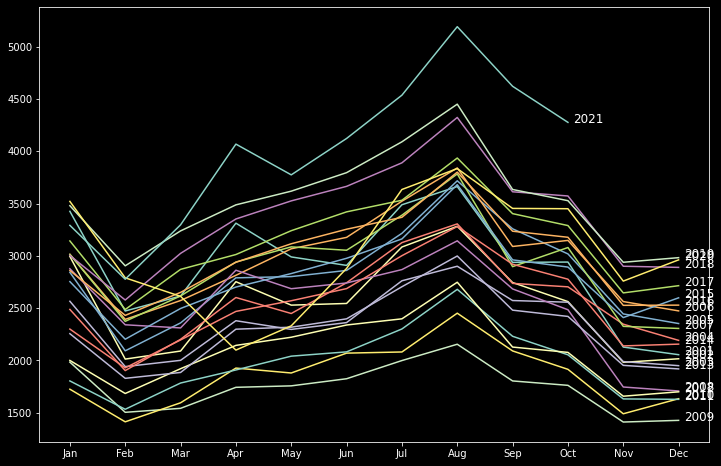

In [138]:
# Checking any seasonal veriability -- plotting quits each year in the same plot

df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

plt.figure(figsize=(12,8))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12)#, color=mycolors[i])
        # plt.legend()

In [139]:
# Testing to see if our time-series is stationary
from statsmodels.tsa.stattools import adfuller, kpss

# KPSS Test
result = kpss(df.value.values, regression='c', nlags='auto')
print(f'\nKPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.8802705675920951
p-value: 0.01
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [24]:
# Using sci-kit learn to build model to see if post-Decision data aligns with pre-Decision forecast

# Helpful TDS article here: https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1
#  Sci-kit learn time-series modeling docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [149]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [87]:
# Want to predict 'total_quits' after date of the Decision based on pre-Decision data

pre_df = pre_decision[['date', 'total_quits']]
pre_df['date'] = pd.to_datetime(pre_df['date'])
pre_df.set_index('date', inplace=True)

/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [172]:
# Splitting up pre-decision data into pre Jan 2010 (train) and post Jan 2010 (test)
# train = df[pre_df.index < pd.to_datetime('2010-01-01', format='%Y-%m-%d')]
# test = pre_df[pre_df.index > pd.to_datetime('2010-01-01', format='%Y-%m-%d')]

train = pre_decision
test = post_decision

x = train['total_quits']
y = test['total_quits']

print(train)
print('-----------')
print(test)

     Unnamed: 0  year period              series_id  value  total_quits month  \
0             0  2000    M12  JTU000000000000000QUL   2331      2331000    12   
1             1  2001    M01  JTU000000000000000QUL   3425      3425000    01   
2             2  2001    M02  JTU000000000000000QUL   2472      2472000    02   
3             3  2001    M03  JTU000000000000000QUL   2615      2615000    03   
4             4  2001    M04  JTU000000000000000QUL   3312      3312000    04   
..          ...   ...    ...                    ...    ...          ...   ...   
111         111  2010    M03  JTU000000000000000QUL   1594      1594000    03   
112         112  2010    M04  JTU000000000000000QUL   1926      1926000    04   
113         113  2010    M05  JTU000000000000000QUL   1879      1879000    05   
114         114  2010    M06  JTU000000000000000QUL   2069      2069000    06   
115         115  2010    M07  JTU000000000000000QUL   2080      2080000    07   

          date            t

In [173]:
ARMAmodel = SARIMAX(x, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43375D+01    |proj g|=  5.34960D-02

At iterate    5    f=  1.43357D+01    |proj g|=  3.47372D-03

At iterate   10    f=  1.43356D+01    |proj g|=  5.64494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   8.484D-06   1.434D+01
  F =   14.335556671288305     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


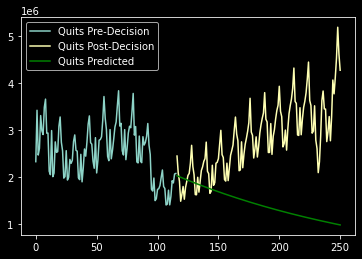

In [174]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(x, label='Quits Pre-Decision')
plt.plot(y, label='Quits Post-Decision')
plt.plot(y_pred_out, color='green', label = 'Quits Predicted')
plt.legend()